In [302]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [303]:
import os
import pandas as pd

file_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [304]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Exploratory Data Analysis

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [306]:
df["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869


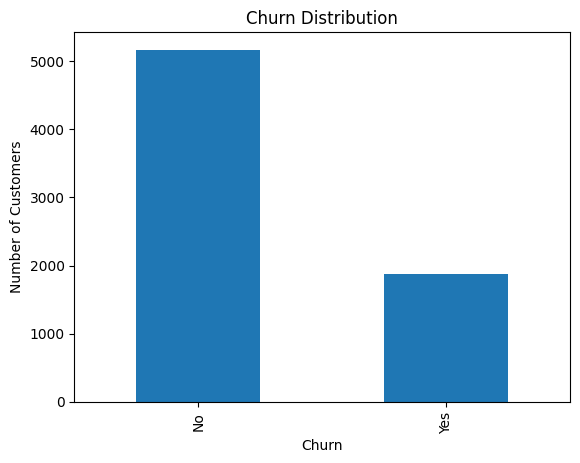

In [307]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


The dataset shows a moderate class imbalance, with significantly more non-churn customers than churn customers, this suggests that accuracy alone may not be enough for evaluating model performance.
Instead use-
Precesion, F1 Score, Recall, Confusion Matrix.

--- also for better results, we can use advanced techniques like stratified train-test split or tuning thresholds etc


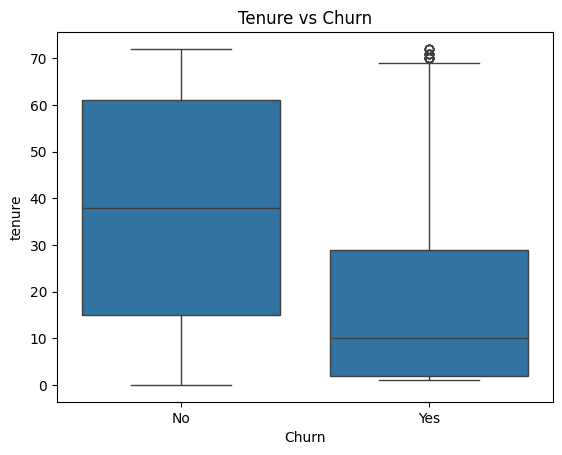

In [308]:
df.columns = df.columns.str.strip()

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


Let's understand how to interpret a boxplot first-


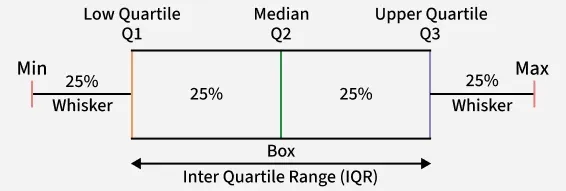

Customers with lower tenure are more likely to leave the service.

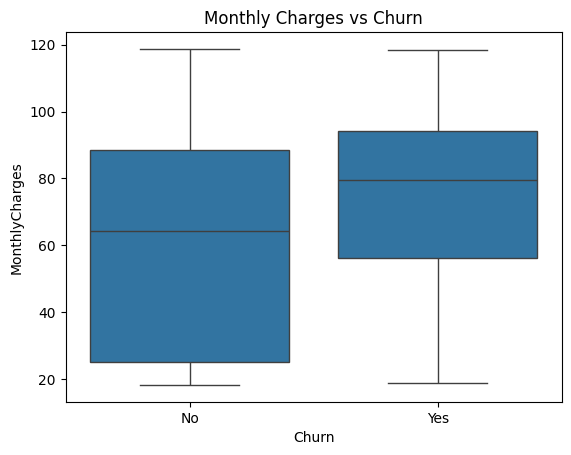

In [309]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Higher MonthlyCharges may influence Customer Retention.

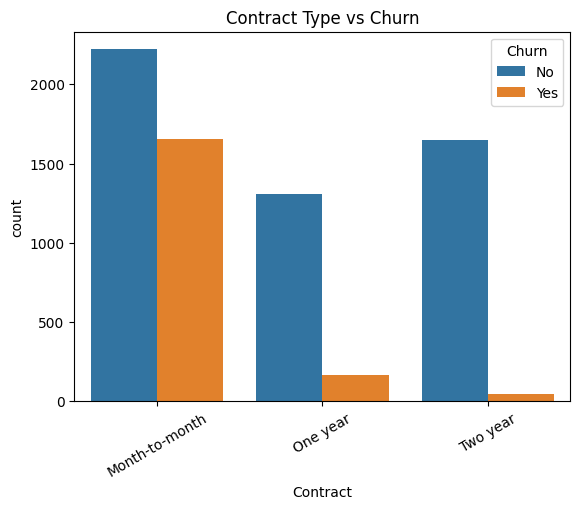

In [310]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=30)
plt.show()


Longer Contracts show lower churn.

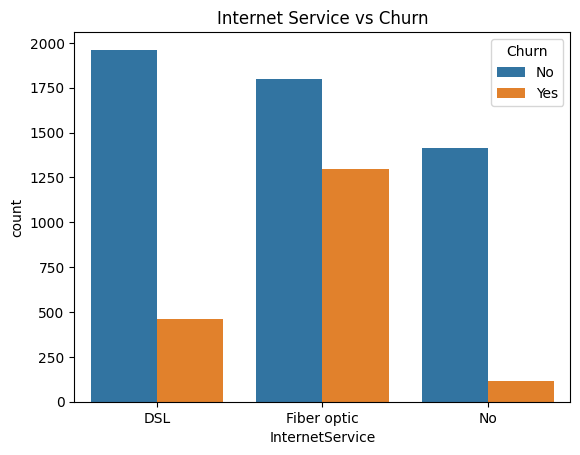

In [311]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()


Fiber Optic - Internet Service shows Higher Churn

In [312]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

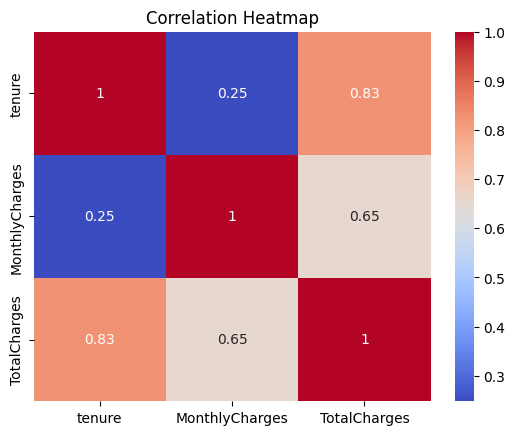

In [313]:
numeric_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Issues to Handle: DATA PREPROCESSING
1. Drop CustomerID as it does not have any predictive power
2. Total Charges Should be a Number
3. Encode Categorical Data - many
4. Missing Values if any
5. Remove Duplicate data
only after this we can actually start EDA


In [314]:
df.duplicated().sum()
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows
df.drop_duplicates(inplace=True)

In [315]:
df.drop("customerID", axis=1, inplace=True)

In [316]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# errors = "coerce" does not crash instead it replaces it with NaN


In [317]:
df["TotalCharges"].dtype

dtype('float64')

In [318]:
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [319]:
df.shape

(7043, 20)

In [320]:
# As the number of missing values are very less, we can just drop them, other alternatives could have been to impute them,
# by mean or median(better when outliers exist), mode(for categorical data) of the data.
# or just use a model that handles missing data like- XGBoost etc.
# or just replace with a constant value
# Advanced ML- use forward fill or backward fill. or predict the missing values first using models like linear regression, knn etc

df = df.dropna()

In [321]:
df.shape

(7032, 20)

In [322]:
cat_cols = df.select_dtypes(include="object").columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [323]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [324]:
df = df.astype(int)


In [325]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [326]:
df.shape
# notice the dimensions increased of the dataset

(7032, 31)

We need to apply feature scaling to the numerical data.


In [327]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

**TRAINING MODELS-**

In [328]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

# train test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


IMP : WE NEED TO SPLIT THE DATA BEFORE FEATURE SCALING TO AVOID DATA LEAKS. ALSO OBSERVE THE MEAN AND STD ARE CALCULATED ON THE TRAIN DATA ONLY AND USED ON SCALING TRAIN AND TEST DATA BOTH.

In [329]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])
# Standardization --- Z score

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
train_mean = X_train[num_cols].mean()
train_std = X_train[num_cols].std()

X_train[num_cols] = (X_train[num_cols] - train_mean) / train_std
X_test[num_cols] = (X_test[num_cols] - train_mean) / train_std

Logistic Regression is well suited for this dataset as it models binary outcomes.

In [330]:
import numpy as np
import pandas as pd # Import pandas to use .to_numpy()

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def compute_loss(y,y_hat):
  eps = 1e-9 # to avoid log 0
  return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    W = np.zeros((n, 1))
    b = 0
    losses = []

    # Convert y to a numpy array and reshape it to (m, 1)
    # This ensures y has a consistent 2D shape with y_hat
    if isinstance(y, pd.Series):
        y = y.to_numpy().reshape(-1, 1)
    elif y.ndim == 1:
        y = y.reshape(-1, 1)

    for i in range(epochs):
        z = np.dot(X, W) + b
        y_hat = sigmoid(z)

        loss = compute_loss(y, y_hat)
        losses.append(loss)

        dW = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        W -= lr * dW
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i} | Loss: {loss:.4f}")

    return W, b, losses

Epoch 0 | Loss: 0.6931
Epoch 100 | Loss: 0.5369
Epoch 200 | Loss: 0.4955
Epoch 300 | Loss: 0.4749
Epoch 400 | Loss: 0.4620
Epoch 500 | Loss: 0.4532
Epoch 600 | Loss: 0.4470
Epoch 700 | Loss: 0.4425
Epoch 800 | Loss: 0.4390
Epoch 900 | Loss: 0.4363


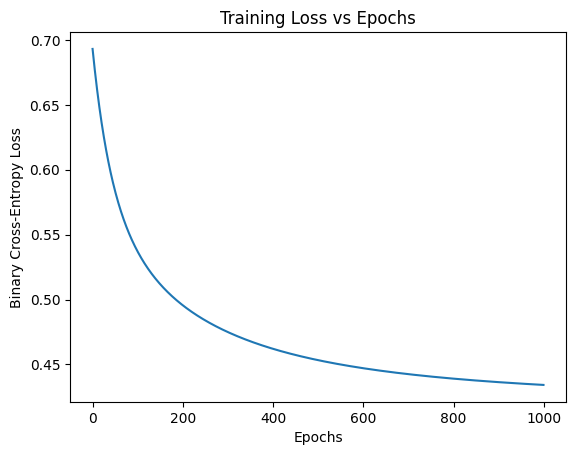

In [331]:
W, b, losses = train_logistic_regression(X_train, y_train)
plt.plot(losses)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()


In [332]:
def predict(X, W, b, threshold=0.5):
    probs = sigmoid(np.dot(X, W) + b)
    return (probs >= threshold).astype(int)
y_pred = predict(X_test, W, b)


In [333]:
def confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true).ravel()
    y_pred = np.array(y_pred).ravel()

    TP = np.sum((y_true == 1) & (y_pred == 1)) # true positive
    TN = np.sum((y_true == 0) & (y_pred == 0)) # true negative
    FP = np.sum((y_true == 0) & (y_pred == 1)) # false positive
    FN = np.sum((y_true == 1) & (y_pred == 0)) # false negative

    return TP, TN, FP, FN


In [334]:
TP, TN, FP, FN = confusion_matrix(y_test, y_pred)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP + 1e-9)
recall = TP / (TP + FN + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.7924662402274343
Precision: 0.6529850746244292
Recall   : 0.4679144385014227
F1 Score : 0.5451713390757951


# K MEANS CLUSTERING

1. Initialize random centroids
2. Label each data point
3. Update Centroids
4. Repeat Steps 2 and 3 until centroids stop changing

In [335]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [336]:
def random_centroids(data, k):
  # Select k random rows from the data DataFrame to serve as initial centroids.
  # Using .sample(n=k) directly returns a DataFrame with k rows.
  centroids_df = data.sample(n=k, random_state=42)
  # Return the centroids as a NumPy array for easier numerical operations.
  return centroids_df.to_numpy()

In [337]:
centroids = random_centroids(X_train,3)

In [338]:
centroids

array([[ 0.        , -0.34887801,  0.18156495, -0.26163446,  1.        ,
         1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.34380018, -1.47903611, -0.67076009,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.62902061,  1.3439857 ,  1.22237974,  0.        ,
         1.        ,  0.        ,  1.        ,  0

In [339]:
distances = np.zeros((X_train.shape[0], centroids.shape[0]))

for i, centroid in enumerate(centroids):
    distances[:, i] = np.sqrt(np.sum((X_train - centroid) ** 2, axis=1))


In [340]:
distances

array([[3.62179985, 5.60600051, 2.96723078],
       [3.52820244, 3.55436555, 4.73214724],
       [4.08970881, 5.33888713, 2.48935368],
       ...,
       [2.51265888, 5.20279997, 2.44667409],
       [2.75032143, 4.45327704, 4.11583455],
       [3.52281831, 4.23883304, 4.30960445]])

In [341]:
def get_labels(data, centroids):
  distances = np.zeros((data.shape[0], centroids.shape[0]))

  for i, centroid in enumerate(centroids):
    distances[:, i] = np.sqrt(np.sum((data - centroid) ** 2, axis=1))

  return np.argmin(distances, axis=1)

In [342]:
labels = get_labels(X_train, centroids)

In [343]:
labels = get_labels(X_train, centroids)
#count number of labels in each class
print("Label counts:", np.bincount(labels))

Label counts: [2558 1261 1806]


In [344]:
def new_centroids(data, labels, k):
    # Calculate the arithmetic mean of data points for each cluster
    # Group data by labels, compute mean for each group, and convert to numpy array
    centroids = data.groupby(labels).mean().to_numpy()
    return centroids

In [345]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [346]:
def plot_clusters(data, labels, centroids, iteration):
    # 🔒 Safety: remove NaN / Inf
    data = np.nan_to_num(data)
    centroids = np.nan_to_num(centroids)

    pca = PCA(n_components=2)

    # Fit PCA on DATA only
    data_2d = pca.fit_transform(data)

    # Transform centroids (NO transpose)
    centroids_2d = pca.transform(centroids)

    clear_output(wait=True)

    plt.figure(figsize=(6, 4))
    plt.title(f"Iteration {iteration}")

    plt.scatter(
        data_2d[:, 0],
        data_2d[:, 1],
        c=labels,
        cmap="viridis",
        alpha=0.6
    )

    plt.scatter(
        centroids_2d[:, 0],
        centroids_2d[:, 1],
        c="red",
        marker="X",
        s=200,
        label="Centroids"
    )

    plt.legend()
    plt.show()

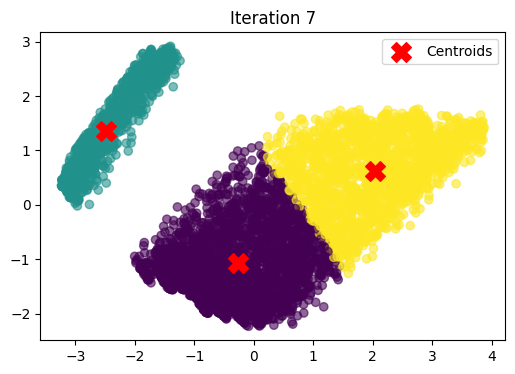

In [347]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(X_train, centroid_count)
old_centroids = np.zeros_like(centroids)

iteration = 1

while iteration < max_iterations and not np.allclose(centroids, old_centroids):
    old_centroids = centroids.copy()

    labels = get_labels(X_train, centroids)
    centroids = new_centroids(X_train, labels, centroid_count)

    plot_clusters(X_train, labels, centroids, iteration)
    iteration += 1


In [348]:
labels = get_labels(X_train, centroids)
#count number of labels in each class
print("Label counts:", np.bincount(labels))

Label counts: [2600 1208 1817]


In [349]:
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
cluster_sizes

{np.int64(0): np.int64(2600),
 np.int64(1): np.int64(1208),
 np.int64(2): np.int64(1817)}

In [350]:
feature_names = X_train.columns.tolist()
# list of column names

for i, centroid in enumerate(centroids):
    print(f"\nCluster {i} centroid:")
    for f, val in zip(feature_names, centroid):
        print(f"{f}: {val:.3f}")



Cluster 0 centroid:
SeniorCitizen: 0.190
tenure: -0.689
MonthlyCharges: 0.100
TotalCharges: -0.554
gender_Male: 0.503
Partner_Yes: 0.345
Dependents_Yes: 0.212
PhoneService_Yes: 0.838
MultipleLines_No phone service: 0.162
MultipleLines_Yes: 0.325
InternetService_Fiber optic: 0.505
InternetService_No: 0.000
OnlineSecurity_No internet service: 0.000
OnlineSecurity_Yes: 0.248
OnlineBackup_No internet service: 0.000
OnlineBackup_Yes: 0.287
DeviceProtection_No internet service: 0.000
DeviceProtection_Yes: 0.267
TechSupport_No internet service: 0.000
TechSupport_Yes: 0.243
StreamingTV_No internet service: 0.000
StreamingTV_Yes: 0.339
StreamingMovies_No internet service: 0.000
StreamingMovies_Yes: 0.342
Contract_One year: 0.127
Contract_Two year: 0.029
PaperlessBilling_Yes: 0.666
PaymentMethod_Credit card (automatic): 0.148
PaymentMethod_Electronic check: 0.487
PaymentMethod_Mailed check: 0.212

Cluster 1 centroid:
SeniorCitizen: 0.037
tenure: -0.075
MonthlyCharges: -1.459
TotalCharges: -0.71

K-Means clustering divided customers into three distinct segments.

Cluster 0 consists of short-tenure, digitally active users with moderate spending behavior.

Cluster 1 represents low-usage customers with no internet services and conservative payment preferences.

Cluster 2 comprises long-tenure, high-value customers who subscribe to multiple services and generate the highest revenue.

These insights can be used to design targeted retention, upselling, and loyalty strategies.